In [1]:
# Linear algebra
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import tmap as tm
from faerun import Faerun 

# Math
from mhfp.encoder import MHFPEncoder 

## Loading data

3 datasets are available (small, medium and large). Each dataset contains a SMILES series + 4 features (2 numericals and 2 categoricals)

In [2]:
df = pd.read_csv('../data/medium.csv')

In [3]:
df.head()

,SMILES,Y1,Y2,Y3,Y4
0,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.22,-8.493732,0,2
1,C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.86,-8.579567,0,2
2,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.09,-5.331233,1,1
3,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.84,-11.412527,0,1
4,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,-6.12,-13.274081,0,4


## TMAP

Code for classic TMAP (from https://github.com/reymond-group/tmap)

In [4]:
# Create labels (shown below the 2D representation of moelcules when you select one)

labels = []
for i, smiles in enumerate(df['SMILES'].values):
    labels.append(
        f"{smiles}" +
        f"__Y1 : {df['Y1'].values[i]}" +
        f"__Y2 : {df['Y2'].values[i]}" +
        f"__Y3 : {df['Y3'].values[i]}" +
        f"__Y4 : {df['Y4'].values[i]}"
    )

In [5]:
enc = MHFPEncoder()
lf = tm.LSHForest(2048, 128)

# The number of permutations used by the MinHashing algorithm
perm = 512

# Initializing the MHFP encoder with 512 permutations
enc = MHFPEncoder(perm)

# Initialize the LSH Forest
lf = tm.LSHForest(perm)

# Create MHFP fingerprints from SMILES
# The fingerprint vectors have to be of the tm.VectorUint data type
fingerprints = [tm.VectorUint(enc.encode(s)) for s in df['SMILES']]

# Add the Fingerprints to the LSH Forest and index
lf.batch_add(fingerprints)
lf.index()

# Get the coordinates
x, y, s, t, _ = tm.layout_from_lsh_forest(lf)

# Now plot the data
faerun = Faerun(view="front", coords=False)

faerun.add_scatter(
    "Assay",
    {"x": x, 
    "y": y, 
    "c": [df['Y1'].values, df['Y2'].values, df['Y3'].values, df['Y4'].values], 
    "labels": labels
    },
    shader="smoothCircle",
    point_scale=5,
    max_point_size=20,
    colormap=["coolwarm", "viridis", "tab10", "Set1"],
    has_legend=True,
    categorical=[False, False, True, True],
    # legend_labels=[("SMILES"), ("pIC50b")],
    series_title=["Y1", "Y2", "Y3", "Y4"],
)


faerun.add_tree("Assay_tree", {"from": s, "to": t}, point_helper="Assay")

# Choose the "smiles" template to display structure on hover
faerun.plot("tmap", template='smiles', notebook_height=0)


/groups/idd/I0549447/code/github/tmap_template/notebook/tmap.html

## Matplotlib TMAP (fixed image)

In [6]:
enc = MHFPEncoder()
lf = tm.LSHForest(2048, 128)

# The number of permutations used by the MinHashing algorithm
perm = 512

# Initializing the MHFP encoder with 512 permutations
enc = MHFPEncoder()

# Initialize the LSH Forest
lf = tm.LSHForest()

# Create MHFP fingerprints from SMILES
# The fingerprint vectors have to be of the tm.VectorUint data type
fingerprints = [tm.VectorUint(enc.encode(s)) for s in df['SMILES']]

# Add the Fingerprints to the LSH Forest and index
lf.batch_add(fingerprints)
lf.index()

# Get the coordinates
x, y, s, t, _ = tm.layout_from_lsh_forest(lf)
 
x = np.array(x)
y = np.array(y)

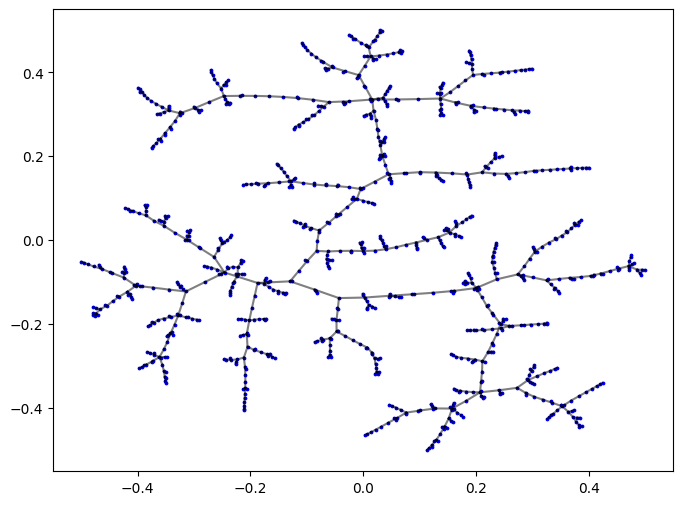

In [7]:
# Matplotlib part, uses edges defined by LSHForest

edges = []
for i, (a, b) in enumerate(zip(s, t)):
    edges.append((a, b))
    
plt.figure(figsize=(8, 6))  # Set the figure size as needed
ax = plt.gca()

# Plot edges
for edge in edges:
    start_node = edge[0]
    end_node = edge[1]
    ax.plot([x[start_node], x[end_node]], [y[start_node], y[end_node]], c='black', alpha=0.5)

ax.scatter(x, y, c='b', s=3)

## Matplotlib TMAP (chronological data) + video

In [8]:
# Add a fake column with a chronological order
num_repeats = df.shape[0] // 10 
df['iteration'] = np.repeat(np.arange(0, 10), num_repeats)

In [9]:
df

,SMILES,Y1,Y2,Y3,Y4,iteration
0,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000,-8.493732,0,2,0
1,C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000,-8.579567,0,2,0
2,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000,-5.331233,1,1,0
3,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000,-11.412527,0,1,0
4,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,-6.120000,-13.274081,0,4,0
...,...,...,...,...,...,...
905,Cc1ccc(NC(=O)c2nscc2NCc2ccncc2)cc1C(F)(F)F,-5.229574,0.001744,1,5,9
906,Cn1c(N2CCN(CCCN3c4ccccc4Sc4ccc(C(=O)O)cc43)CC2...,-5.000000,-7.058779,1,1,9
907,Cn1cncc1CN1CC(N(Cc2ccccn2)S(=O)(=O)c2ccccn2)Cc...,-5.797940,-5.022201,1,4,9
908,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,-4.480000,-8.244845,0,0,9


In [10]:
for i in range(10):

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    fig.patch.set_facecolor('black')

    old_ids = df[df['iteration'] < i].index.tolist()
    new_ids = df[(df['iteration'] >= i) & (df['iteration'] < i+1)].index.tolist()
    
    x_new = x[new_ids]
    y_new = y[new_ids]
    x_old = x[old_ids]
    y_old = y[old_ids]

    ax.scatter(x_new, y_new, c='red', s=15, zorder=2)
    ax.scatter(x_old, y_old, c='green', s=15, zorder=2)

    for edge in edges:
        start_node = edge[0]
        end_node = edge[1]
        ax.plot([x[start_node], x[end_node]], [y[start_node], y[end_node]], c='white', alpha=0.5, linewidth=1, zorder=1)

    ax.set_title(f"Iteration : {i}", c='white')
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(f"../img/iteration_{i}.png", dpi=300)
    plt.close()



### Create video using opencv

In [ ]:
import cv2
import glob

# Specify the path to your image folder
img_folder_path = '../img/*.png' # You may need to modify this depending on where your images are stored
output_video = '../img/output.avi' # The path and name of the video file you want to create

# Get the list of all files in the directory sorted by name
img_files = sorted(glob.glob(img_folder_path))

# Assuming that all images are the same size, get the size of the first image
img = cv2.imread(img_files[0])
height, width, layers = img.shape

# Choose the video codec according to the file type you want to output (Here, *.avi)
fourcc = cv2.VideoWriter_fourcc(*'DIVX') 

# Create the video write object
video = cv2.VideoWriter(output_video, fourcc, 1.0, (width, height))

# Write images to video object
for file in img_files:
    img = cv2.imread(file)
    video.write(img)

# Close the video write object
video.release()